In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.8 MB/s eta 0:00:00


In [6]:
from diffusers import StableDiffusionImageVariationPipeline
from PIL import Image
from matplotlib import pyplot as plt
import torchvision.transforms as transforms

In [3]:
device = "cpu"
sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
  "lambdalabs/sd-image-variations-diffusers",
  revision="v2.0",
  )
sd_pipe = sd_pipe.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


(-0.5, 1241.5, 374.5, -0.5)

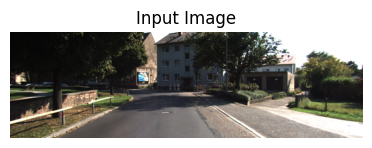

In [4]:
im = Image.open("/content/input.png")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(im)
plt.title('Input Image')
plt.axis('off')

In [7]:
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
    ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)

out = sd_pipe(inp, guidance_scale=3)

  0%|          | 0/50 [00:00<?, ?it/s]

In [10]:
out["images"][0].save("result.jpg")


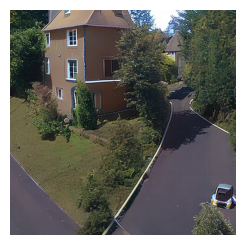

In [9]:
plt.subplot(1, 2, 2)
plt.imshow(out["images"][0])
plt.axis('off')
plt.show()